## Instalando depêndencias

In [1]:
# !pip install spacy
# !pip install wordcloud
# !python -m spacy download pt
# !python -m spacy download pt_core_news_sm

## Imports

In [2]:
import os
import json
import pandas as pd

## Carregamento do Dataset

In [3]:
with open('./datasets/Tweets.json', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.columns = ['title', 'body', 'author']
df.head()

,title,body,author
0,00110011o,mano o torcedor psicopata do Brasil faz ADS na...,- ジジリ
1,01far,torcedor reclama de tudo\n se não convoca recl...,- robson
2,0Gregory2,@GinhoGFBPA Cara eu torço pro inter e peço des...,- yurioh
3,0btuso,Tem gente que quer ser Hexa mas não merece nem...,Fernando Favero
4,10vascoAugusto,@ManuelaDavila Pelo visto a ONU têm muito conh...,Antonio Augusto


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   866 non-null    object
 1   body    866 non-null    object
 2   author  866 non-null    object
dtypes: object(3)
memory usage: 20.4+ KB


## Criação do modelo para treinamento

In [5]:
# from spacy.lang.pt import Portuguese
# nlp = Portuguese()

import spacy
nlp = spacy.load("pt_core_news_sm")
nlp.max_length = 2000000

In [6]:
for word in nlp('Olá, meu nome é Guilherme. Tenho 29 anos, sou casado e tenho três lindos filhos.'):
    print(word, ' - ', word.pos_)

Olá  -  NOUN
,  -  PUNCT
meu  -  DET
nome  -  NOUN
é  -  AUX
Guilherme  -  PROPN
.  -  PUNCT
Tenho  -  VERB
29  -  NUM
anos  -  NOUN
,  -  PUNCT
sou  -  AUX
casado  -  ADJ
e  -  CCONJ
tenho  -  VERB
três  -  NUM
lindos  -  NOUN
filhos  -  NOUN
.  -  PUNCT


In [7]:
new_stop_words = ['https', '://', 'http', '/', 'co', 't', '@']
for word in new_stop_words:
  nlp.vocab[word].is_stop = True

In [8]:
def tokenizer(sentence: str):
    sentence = sentence.lower()

    list = []
    list = [word.lemma_ for word in nlp(sentence) if not (word.is_stop or word.like_num or word.is_punct or word.is_space or len(word) == 1)]

    return ' '.join([str(element) for element in list])

In [9]:
df['body_tokenizer'] = df['body'].apply(tokenizer)

In [10]:
df[['body', 'body_tokenizer']].head(15)

,body,body_tokenizer
0,mano o torcedor psicopata do Brasil faz ADS na...,manir torcedor psicopata brasil ads fatec fran...
1,torcedor reclama de tudo\n se não convoca recl...,torcedor reclamar convocar reclamar convocar r...
2,@GinhoGFBPA Cara eu torço pro inter e peço des...,@ginhogfbpa caro torcer pro inter pedir descul...
3,Tem gente que quer ser Hexa mas não merece nem...,gente hexa merecer troféu várzea https://t.co/...
4,@ManuelaDavila Pelo visto a ONU têm muito conh...,@manueladavila vestir onu conhecimento acontec...
5,BASTIDORES | FLAMENGO 1X0 GRÊMIO - COPA DO BRA...,bastidor flamengo 1x0 grêmio copar brasil ser ...
6,@agfon21 nossa ontem depois da eliminação do B...,@agfon21 eliminação brasil entrar twitter deus...
7,"@radioitatiaia Semifinal de copa do Brasil, Lé...",@radioitatiaia semifinal copar brasil léo mano...
8,Brasil name 2️⃣4️⃣man squad for upcoming frien...,brasil name 2️⃣4️⃣man squad upcoming friendlie...
9,Quem tinha a expectativa de ver o torcedor nos...,ter expectativa torcedor próximo jogo brasil f...


## Criação do corpus

In [11]:
if not os.path.exists('./datasets/corpus'):
    os.makedirs('./datasets/corpus')

In [12]:
for index, row in df.iterrows():
    file = f'./datasets/corpus/{row["title"]}.txt'

    with open(file, 'w', encoding='utf-8') as f:
        f.write(row['body_tokenizer'])

In [13]:
from nltk.corpus import PlaintextCorpusReader
corpus = PlaintextCorpusReader('./datasets/corpus', '.*')

In [14]:
ids = corpus.fileids()
ids[0]

'00110011o.txt'

In [15]:
corpus.raw('00110011o.txt')

'manir torcedor psicopata brasil ads fatec franco entender porq'

In [16]:
words = corpus.words()
print(words)

['manir', 'torcedor', 'psicopata', 'brasil', 'ads', ...]


In [17]:
len(words)

12108

## Criação da tabela de termos frequentes

In [18]:
import nltk

frequency = nltk.FreqDist(words)
most_common = frequency.most_common(20)
most_common

[('.', 601),
 ('t', 600),
 ('/', 596),
 ('https', 594),
 ('://', 594),
 ('co', 594),
 ('torcedor', 522),
 ('@', 427),
 ('brasil', 426),
 ('sinistrar', 188),
 ('copar', 106),
 ('pra', 78),
 ('brasileiro', 69),
 ('russo', 66),
 ('jogar', 57),
 ('ficar', 52),
 ('caro', 51),
 ('seleção', 47),
 ('achar', 47),
 ('convocar', 43)]

## Criação da nuvem de palavras

In [19]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

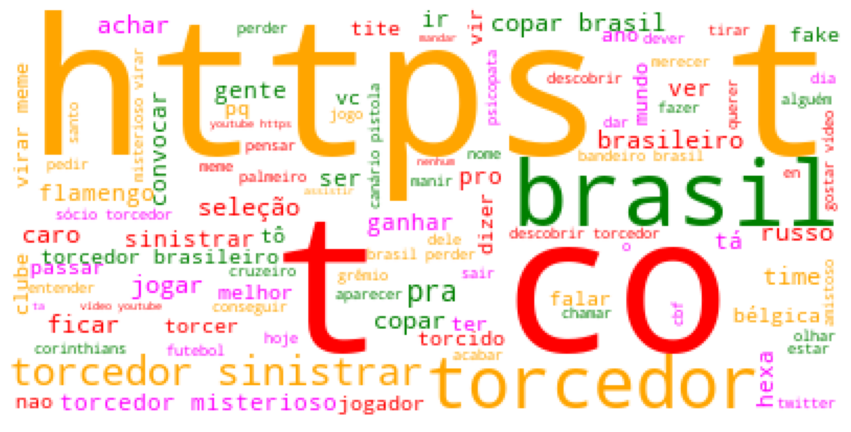

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(background_color='white', max_words=100, colormap=color_map)

cloud = cloud.generate(df['body_tokenizer'].str.cat(sep='\n'))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Documentos similares com TF-IDF

### TF-IDF (Term frequency - inverse document frequency)

- Redimensionar a frequência das palavras pela frequência com que aparecem em todos os documentos
- **Term frequency (TF)**: frequência da palavra no documento atual - TF = (número de vezes que o termo **t** aparece no documento) / (número de termos no documento)
- **Inverse document frequency (IDF)**: quão rara é a palavra nos documentos - IDF = log(N/n), **N** é o número de documentos e **n** é o número de documentos que o termo **t** apareceu
- **TF-IDF**: importância de uma palavra para um documento em uma coleção ou corpus

- Considerando um documento com 100 palavras no qual a palavra cachorro aparece 5 vezes
- TF = 5 / 100 = 0.05
- Temos 100 documentos no total (N) e a palavra cachorro aparece aparece em 20 desses documentos (n)
- IDF = log(100 / 20) = 0.69
- TF-IDF = 0.05 * 0.69 = 0.034

- Quanto maior o valor do peso, mais raro é o termo. Quanto menor o peso, mais comum é o termo

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer()
vectorizer = Tfid.fit_transform(df['body_tokenizer'])

In [22]:
type(vectorizer)

scipy.sparse.csr.csr_matrix

In [23]:
print(Tfid.get_feature_names())

', 'hrvpmrrfuo', 'hs', 'hskcf02klh', 'htktp3fe1v', 'https', 'htwteduxm6', 'hudmimnl3w', 'hugo', 'hugo_meello', 'humanar', 'humanidade', 'humano', 'hur5dukm3h', 'huracan', 'hvbvbqqlky', 'hvfcgyoihq', 'hvxq1akusc', 'hypjvpuwtt', 'i1jsivc6ji', 'i2qjvdtuqo', 'i4imph6gg4', 'ibope', 'icone', 'icz8rrpenj', 'icônico', 'id0mgfp8la', 'idade', 'idear', 'ideia', 'iden', 'identidade', 'identificar', 'idh', 'idiota', 'idolas', 'idolatrar', 'iemcqmcj9w', 'igfpgfchqi', 'igjtvlxdyk', 'igmvvb0ofz', 'ignorar', 'igual', 'igualzim', 'igualzinhos', 'ihi2qxee4o', 'ihytnejhg2', 'iidqsj3uvc', 'illuminatis', 'ilqoehrdgg', 'iludir', 'ilusão', 'ilysmjhs', 'imagensday', 'imaginar', 'imbecil', 'imenso', 'imitar', 'imparcialidade', 'impeachment', 'imperio', 'impor', 'importante', 'importância', 'impossível', 'imprensar', 'impressionante', 'impressão', 'inabalável', 'inacreditável', 'incluir', 'incompreensível', 'inconstitucional', 'incopetente', 'incrivel', 'incrível', 'indústria', 'inelegível', 'infeliz', 'infelizm

In [24]:
print('Feature names:', len(Tfid.get_feature_names()))

Feature names: 3082


In [25]:
print('Vocabulary: ', Tfid.vocabulary_)

: 2983, 'rx8kc2oxz0': 2464, 'mascotar': 1766, 'tranquilo': 2762, 'nx1jvybhew': 1983, 'vascaíno': 2847, 'kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk': 1614, 'k6wyozpll8': 1582, 'superaçã': 2638, 'upnlj0wlbp': 2823, 'saiiiiu': 2478, 'vlog': 2913, 'canal': 508, 'cabulosa': 483, 'sant': 2492, 'qbvird1mtf': 2285, 'cássio': 776, 'teuol7ox0': 2697, 'aceito': 119, 'questõ': 2317, 'fy2lbgfyqj': 1223, 'vibração': 2880, '2kmakd9obx': 40, 'convencer': 687, 'desgraçar': 856, 'menezes': 1804, 'trampo': 2760, 'corinth': 705, 'y021knxjkr': 3008, 'enganar': 989, 'dislike': 890, 'belo': 380, 'investigação': 1483, 'ah': 168, 'pronto': 2244, 'gatar': 1250, 'cidade': 589, 'mirny': 1842, 'quase': 2307, 'quilômetros': 2320, 'distância': 894, 'capital': 520, 'mosc': 1875, 'o295rbim3c': 1995, 'thonight_sccp': 2710, 'botafoguense': 421, 'ti': 2712, 'crrh9jhipp': 746, 'beber': 371, 'bolar': 408, 'qb691mnjcc': 2284, 'aeroporto': 152, 'papel': 2075, 'yifjjnyru3': 3015, 'levantar': 1662, 'cabeça': 479, 'adversário': 149, 

In [26]:
print(Tfid.idf_)

[7.0718918  7.0718918  7.0718918  ... 7.0718918  7.0718918  5.68559744]


In [27]:
vectorizer

<866x3082 sparse matrix of type '<class 'numpy.float64'>'
	with 8989 stored elements in Compressed Sparse Row format>

In [28]:
vectorizer.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
vectorizer.todense().shape

(866, 3082)

## Similaridade do cosseno

- Link: https://en.wikipedia.org/wiki/Cosine_similarity
- Cálculos passo a passo: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/
- Temos duas matrizes: TF e IDF
- Cosine Similarity (d1, d2) =  Dot product(d1, d2) / ||d1|| * ||d2||

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [34]:
vectorizer[0].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [35]:
cosine_similarity(vectorizer[0], vectorizer[1])

array([[0.00626064]])

In [36]:
cosine_similarity(vectorizer[0], vectorizer[3])

array([[0.]])

In [53]:
similarity = cosine_similarity(vectorizer[0], vectorizer)

### Validando a similariedade na base de dados

In [42]:
textos = df['body_tokenizer'].tolist()
texto = 'tocedor brasileiro psicopata'

In [43]:
tFil = TfidfVectorizer()
vectorized = tFil.fit_transform(textos)

texto = tokenizer(texto)
texto_vectorized = Tfid.transform([texto])

In [52]:
similarity = cosine_similarity(texto_vectorized, vectorized)

In [47]:
scores = {}
for i, value in enumerate(similarity[0]):
    scores[i] = value

In [51]:
import operator

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

sorted_scores[0:3]

[(286, 0.6129425242833553),
 (394, 0.42642755218556744),
 (16, 0.3766918089387749)]

In [30]:
# nlp = spacy.load('pt')
# words = nlp('Ola guilherme, bem vindo! Feliz aniversário... Hoje você faz 29 anos.')
# for word in words:
#     print(word, ' - ', word.tag_)

In [31]:
# spacy.displacy.serve(words, style='dep')